## Matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#plot 에서 한글 사용시 깨지지 않게 하기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/HMKMG.ttf').get_name()
rc('font',family=font_name)

## 8.1.1 figure 만들기

figure의 사이즈를 정하고 각각의 서브플롯의 위치를 정한다.

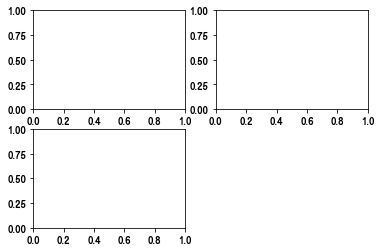

In [5]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)

### 현재 만들어진 figure 확인


get current figure

plt.gcf()

In [7]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### 선언된 서브플롯의 이름과 도트 연산자를 통하여 그래프 생성

fig.add_subplot()의 반환값은 AxesSubplot이다. = plt의 인스턴스 같은것

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


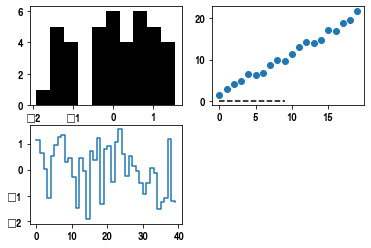

In [6]:
# fig1.clear()
data = np.random.randn(40)
data2 = np.random.randn(40)

ax1.hist(data,color='k')
ax2.scatter(np.arange(20),np.arange(20)+3*np.random.rand(20))
ax3.plot(data,drawstyle='steps-post',label='step-post')
ax2.plot([0 for i in range(10)],'k--') #위에 ax2와 겹쳐서 그려진다.

fig1

## 반복해서 실행하면 추가로 계속 그려진다. append의 느낌


### subplots

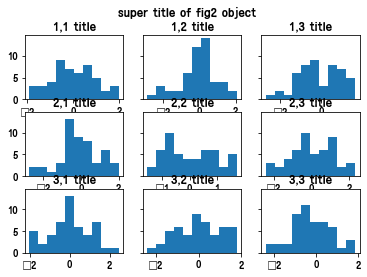

In [7]:
fig2, axes = plt.subplots(3,3, sharex= False, sharey = True)

for i in range(3):
    for j in range(3):
        axes[i,j].set_title(f'{i+1},{j+1} title')
        axes[i,j].hist(np.random.randn(50))
fig2.suptitle('super title of fig2 object')
plt.show(axes[2,1])  #이게 몰까여?
# plt.show()

### figure 안의 subplots 간의 간격조절

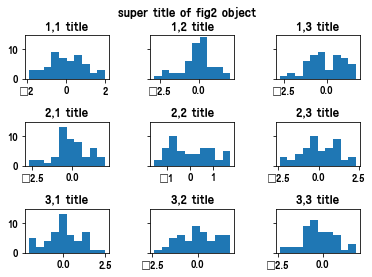

In [8]:
fig2.subplots_adjust(wspace=0.5,hspace=1)
fig2

In [33]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## 8.1.2 색상,마커,선 스타일

ax.plot(x,y,linestyle='--',color='k', marker='o', drawstyle='steps-post, label='')  
- 축약하여 'k--' 가능

linestyle: 선의 스타일 '-' 나 '--' 등등  
color: k 검정, g 초록, r 빨강, b 파랑  
marker: 꼭지점에 강조 'o','v','x'  


위를 축약하여 사용하는 법: color+marker+linestyle

drawstyle: 그려지는 스타일  
label: 그리려는 선의 이름  
plt.legend(loc='best')

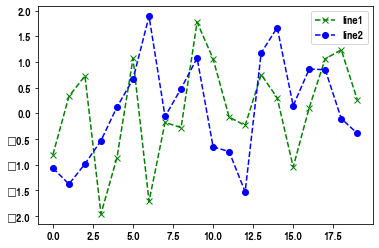

In [9]:
smpldata = np.random.randn(20)
smpldata2 = np.random.randn(20)
plt.plot(smpldata,'g--',marker='x',label='line1')
plt.plot(smpldata2,'bo--',label='line2')
plt.legend(loc='best')


## 8.1.3 눈금, 라벨, 범례

제목, 축이름, 눈금, 눈금 이름 설정

눈금 변경 메서드(x축)

ax.set_xticks([]): 축 눈금의 범위와 숫자 설정

ax.set_xticklabels([]): 축의 눈금 이름

ax.set_xlabel(''): 축의 이름

ax.set_title(''): 서브플롯의 제목설정

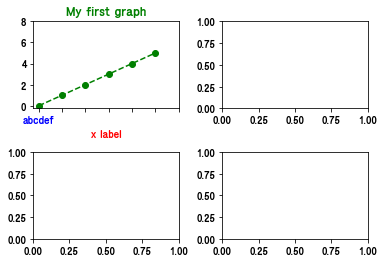

In [10]:
datax = np.arange(6)
figure, ax = plt.subplots(2,2)
ax[0,0].plot(datax,'go--')
ax[0,0].set_xticks([i for i in range(7)])
ax[0,0].set_yticks([i for i in range(0,10,2)])
ax[0,0].set_xticklabels(['abcdef'],color='b')

ax[0,0].set_xlabel('x label', color='r')
ax[0,0].set_title('My first graph',color = 'g')
figure.subplots_adjust(wspace=0.3,hspace=0.5)




### 범례 추가하기

같은 표에 여러 그래프를 삽입 시 각 그래프를 식별하는것

In [16]:
datak = np.random.randn(10)
ax[0,1].plot(datak,'b--',label='line1')

1.3 µs ± 36.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


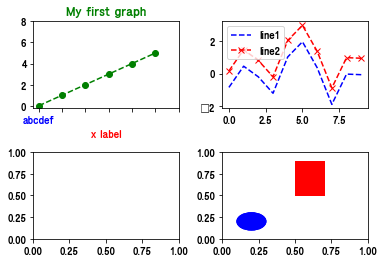

In [14]:
ax[0,1].plot(datak+1,'rx--',label='line2')
ax[0,1].legend(loc='best')
figure

## 8.1.4 주석과 그림 추가

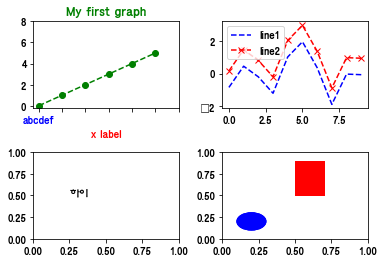

In [15]:
ax[1,0].text(0.25,0.5,'하이',fontsize=10)
figure

### 도형 추가하기

먼저 도형 객체를 만들어준다.

객체 이름= plt.Rectangle((,), 가로길이, 세로길이, color=, alpha=) / 튜플은 왼쪽 하단부 꼭짓점

객체 이름 = plt.CIrcle((,),반지름)

객체 이름 = plt.Polygon([,],[,],[,].....) /각 점을 잇는다

서브플롯에 add_patch함수를 이용하여 추가

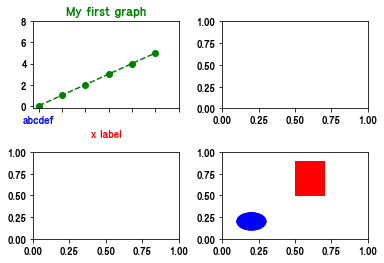

In [12]:
rect = plt.Rectangle([0.5,0.5],0.2,0.4,color='r')
circ = plt.Circle([0.2,0.2],0.1,color='b')

ax[1,1].add_patch(rect)
ax[1,1].add_patch(circ)
figure


## 8.1.5 그래프를 파일로 저장

figure 이름.savefig('원하는 파일 이름.확장자명',dpi=,bbox_inch=,facecolor=,edgecolor=)

dpi: 인치당 도트 해상도

bbox_indches: 'tight' 메서드는 실제 figure의 둘레 공백 자르기

facecolor: 서브플롯의 바깥 색상

In [49]:
fig2.savefig('fig2.pdf',dpi=400,bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:2001: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:2099: RuntimeWarning: Glyph 8722 missing from current font.
  flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:2001: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py

# pandas로 그래프 그리기

pandas 개체는 기본적으로 행과 열의 이름 등 많은 정보를 담고 있다.

따라서 matplotlib로 그래프를 그릴 때 보다 코드를 짧게 줄일 수 있다.

색인은 x 축으로 해석된다.

use_index: 색인 값을 x 축으로 사용할지 여부

xticks: x축의 눈금을 직접 설정

xlim : x축의 한계 범위 설정

pd객체.plot() : 기본값은 선을 그려준다.

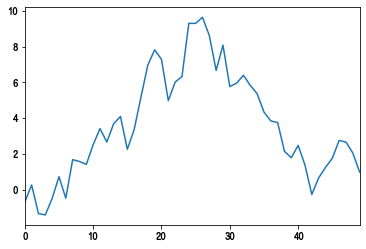

In [17]:
s = pd.Series(np.random.randn(50).cumsum())
s.plot(use_index=False)

datafframe으로 plot 그리기 각열의 header 이름(column) 값이 범례가 된다( 선 하나씩).

dataframe 에서만 사용하는 plot 옵션:

- subplots: 각 column을 다른 서브플롯에 그릴것인가
- sharex,sharey: 서브플롯끼리 축을 공유하고 눈금과 한계를 연결  
- figsize: 생성될 그래프의 크기를 튜플로 지정  
- title: 그래프 제목  
- legend: 서브플롯의 범례추가  
- sort_columns: column을 알파벳 순서로 그린다.

In [38]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns = [list('ABCD')],
                 index = np.arange(0,100,10))
df

,A,B,C,D
0,-2.166119,1.141310,0.708355,0.299670
10,-3.778711,2.062832,2.170455,0.767837
20,-4.097956,1.406550,2.486536,0.194030
30,-5.494239,3.423923,2.651874,2.520551
40,-6.924691,2.693674,2.460986,2.630100
50,-5.537681,5.539800,2.273464,2.608125
60,-5.973524,4.934818,1.388049,3.082994
70,-7.410052,3.396318,1.662831,3.877840
80,-7.161846,3.474880,1.590315,2.785919
90,-6.301873,3.194296,0.551835,0.742134


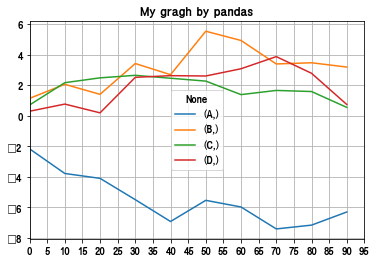

In [39]:
df.plot(xticks= [ i for i in range(0,100,5)],grid=True,title='My gragh by pandas',
       figsize=(10,7),subpolts=True)

subplots =True : 분리하여 그리기

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B10FFE0FC8>,
      dtype=object)

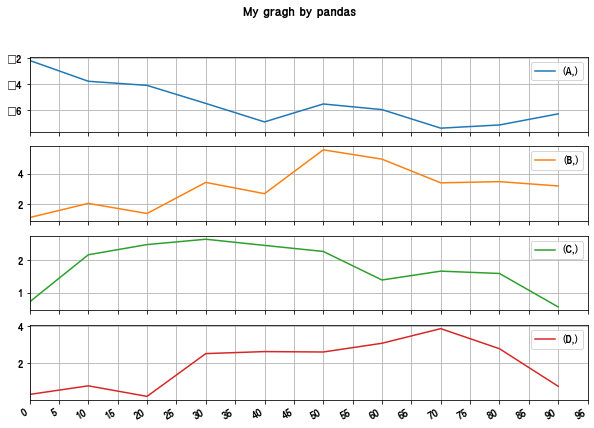

In [43]:
df.plot(kind='line', xticks= [ i for i in range(0,100,5)],grid=True,title='My gragh by pandas', figsize=(10,7),subplots=True)

범례의 이름을 추가하고 싶은 경우

초기 dataframe의 column 이름을 설정하여 주면 그것이 범례 이름이 된다.

col_name,A,B,C,D,E
idx_name,,,,,
0,0.654305,0.339395,1.469565,-0.683495,0.932275
1,1.666927,-0.049672,1.651184,-1.296658,1.192918
2,4.082714,-1.059642,1.257121,-1.476494,1.366917
3,3.475438,-1.248240,2.625072,-1.178773,1.916977
4,3.709165,-3.882022,1.490455,0.103300,0.005340
5,4.097450,-5.288205,2.475638,2.927592,-0.810565
6,1.384313,-6.143552,2.014251,2.192701,0.920406
7,1.983790,-6.280625,2.367023,1.993703,1.843227
8,3.811495,-5.176308,2.533381,1.333897,1.897065


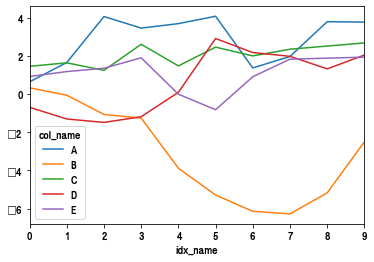

In [48]:
df2 = pd.DataFrame(np.random.randn(10,5).cumsum(0),
                  columns= pd.Index(list('ABCDE')))
df2.index.name='idx_name'
df2.columns.name='col_name'
df2.plot()
df2

## 8.2.2 막대그래프

plot(kind='bar' or 'barh')

bar: 수직막대 / barh: 수평막대 / line: 직선형태

kde (kernel density estimate): 근사한 값을 추정하여 그래프를 그린다.

---

1차원 데이터셋

a    0.590866
b    0.481017
c    0.000276
d    0.848180
e    0.243004
f    0.230411
g    0.953173
h    0.591151
i    0.395823
j    0.476540
k    0.881312
l    0.302929
m    0.749151
n    0.780742
o    0.314142
p    0.056906
dtype: float64

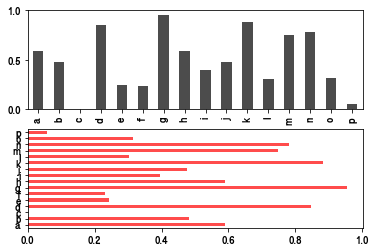

In [50]:
fig3, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index= list('abcdefghijklmnop'))

data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
data.plot(kind='barh',ax=axes[1],color='r',alpha=0.7)
data

2차원 데이터 셋

,one,two,three,four
a,0.431326,0.477638,1.325759,0.884455
b,1.235592,0.087145,0.615997,1.146093
c,0.151621,0.057193,1.786636,0.550523
d,0.154311,1.509390,1.059322,0.463586
e,0.265831,0.956519,0.574679,1.391960
f,0.605423,0.177968,0.751431,0.598537


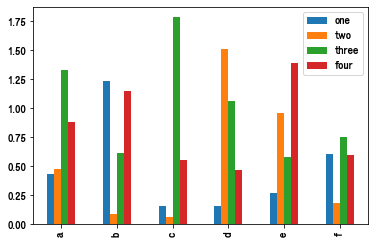

In [55]:
data2 = pd.DataFrame(abs(np.random.randn(6,4)),
                    index = list('abcdef'),
                    columns = ['one','two','three','four'])
display(data2)
data2.plot(kind = 'bar')

## DataFrame  에서만 사용하는 plot 옵션

- 상동  
plus  
- stacked: 값이 하나의 막대에 싸아져 출력

---

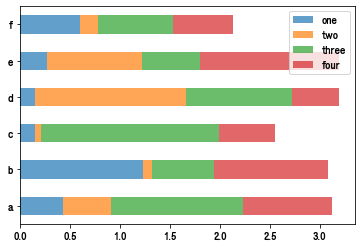

In [59]:
data2.plot(kind='barh',stacked=True,alpha=0.7)

## 8.2.3 히스토그램과 밀도 그래프

---

Series/df.hist()

0       0.618261
1       1.083070
2       0.603942
3       0.280390
4      -0.343687
         ...    
395    10.695485
396     8.417632
397    12.269151
398     6.182979
399     6.580472
Length: 400, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


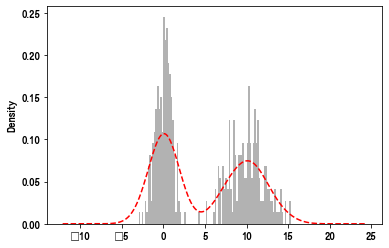

In [65]:
comp1 = np.random.normal(0,1,size=200) #N(0,1)
comp2 = np.random.normal(10,2,size=200)

values = pd.Series(np.concatenate([comp1,comp2]))
display(values)

values.hist(bins= 100, alpha=0.3, color='k',normed=True)
values.plot(kind='kde',style= 'r--')

## 8.2.4 산포도

산포도: 2개의 1차원 데이터 묶음 간의 관계를 나타내고자 할때 유용한 그래프

scatter(x_data,y_data)

dataframe을 scatter에 적용할 수 있는 pandas 에서 제공하는 메서드도 있다.

-각 열끼리의 scatter 를 한번에 그려준다.!!

pd.scatter_matrix(data,diagonal='')

diagonal:i,i에서 그릴 메서드

---

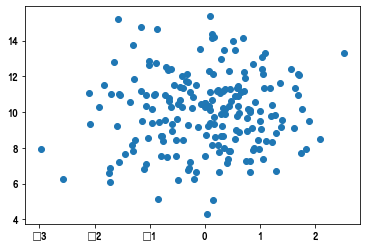

In [67]:
plt.scatter(comp1,comp2)

,one,two,three,four
a,0.431326,0.477638,1.325759,0.884455
b,1.235592,0.087145,0.615997,1.146093
c,0.151621,0.057193,1.786636,0.550523
d,0.154311,1.509390,1.059322,0.463586
e,0.265831,0.956519,0.574679,1.391960
f,0.605423,0.177968,0.751431,0.598537


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B116AC4608>,
      dtype=object)

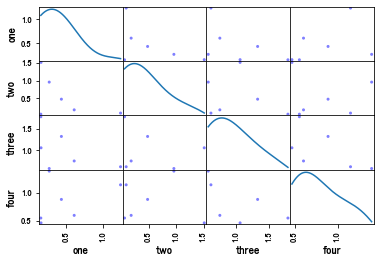

In [73]:
display(data2)
pd.plotting.scatter_matrix(data2,diagonal='kde',color='b')

# 8.4 파이썬 시각화 도구 생태계

장: 출판물에 사용되는 그래프 시각화에는 충분한 성능

단: 통계적 그래프에는 결점을 보인다.

## 8.4.1 Chaco

---

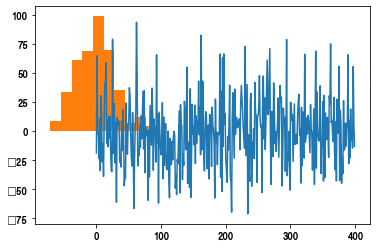

In [80]:
d= np.random.normal(0,30,size=400)
fig6 = plt.figure()
i1 = plt.plot(d)
i2 = plt.hist(d)

plt.show(fig6)

In [81]:
plt.gcf

<function matplotlib.pyplot.gcf()>